# Q1. Build and evaluate multiple classification models on a real dataset.

## 1. Dataset Loading & Exploration (3 marks)

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer


In [179]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]], shape=(569, 30)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [180]:
x = data.data
y = data.target
x.shape,y.shape

((569, 30), (569,))

In [181]:
feature = data.target_names
feature

array(['malignant', 'benign'], dtype='<U9')

<Axes: ylabel='Count'>

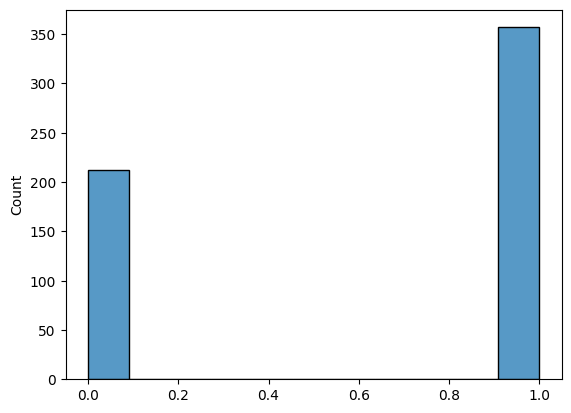

In [182]:
sns.histplot(y)

## 2. Pre-processing (2 marks)

In [183]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,shuffle=True)

In [184]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## 3. Model Building – Train 3 Classification Algorithms (4 marks)

### Logistic Regression

In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score
modelLR = LogisticRegression(max_iter=500,random_state=42)


In [186]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [187]:
cv_score = cross_val_score(modelLR, x_train, y_train, cv=cv, scoring="accuracy")
cv_score

array([0.96703297, 0.97802198, 0.94505495, 0.97802198, 0.97802198])

In [188]:
print(cv_score.mean())

0.9692307692307691


In [189]:
modelLR.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [190]:
y_pred = modelLR.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1])

In [191]:
accLR = accuracy_score(y_test,y_pred)

<Axes: >

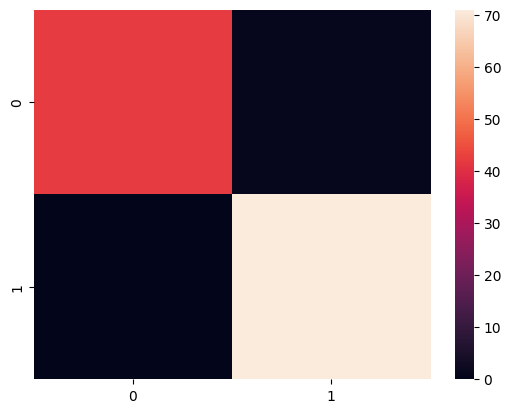

In [192]:
sns.heatmap(confusion_matrix(y_test,y_pred))

In [193]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



### Decision Tree Classifier

In [194]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

base_tree = DecisionTreeClassifier(random_state=42)
modelDTC = BaggingClassifier(estimator=base_tree, n_estimators=50, max_samples=0.8, max_features=1.0, bootstrap=True, random_state=42)
modelDTC.fit(x_train,y_train)

,estimator,DecisionTreeC...ndom_state=42)
,n_estimators,50
,max_samples,0.8
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,42
,verbose,0


In [195]:
y_pred = modelDTC.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1])

In [196]:
accDTC = accuracy_score(y_test,y_pred)

<Axes: >

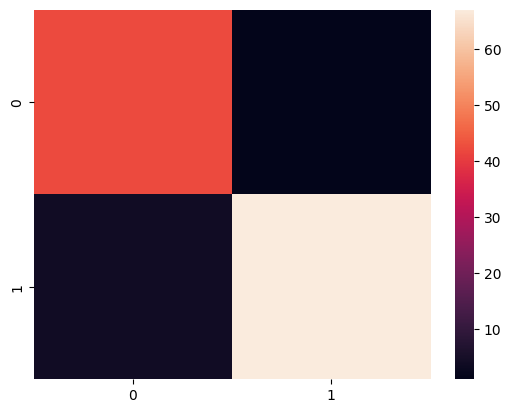

In [197]:
sns.heatmap(confusion_matrix(y_test,y_pred))

In [198]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        43
           1       0.99      0.94      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



### Random Forest Classifier

In [199]:
from sklearn.ensemble import RandomForestClassifier
modelRFC = RandomForestClassifier(n_estimators=100, random_state=42)
modelRFC.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [200]:
y_pred = modelRFC.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1])

In [201]:
accRTC = accuracy_score(y_test,y_pred)

<Axes: >

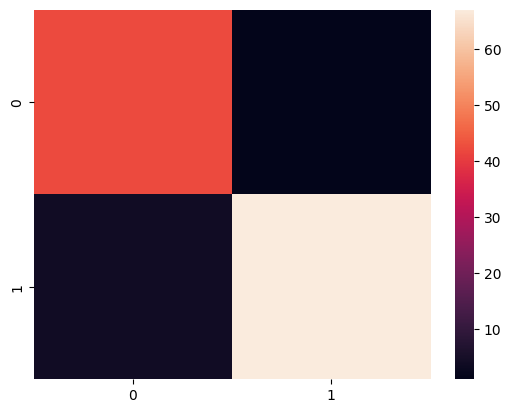

In [202]:
sns.heatmap(confusion_matrix(y_test,y_pred))

In [203]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        43
           1       0.99      0.94      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



### Summary

In [204]:
print("Accuracy Scores: \n",
      f"LogisticRegression: {accLR}\n",
      f"DecisionTreeClassifier: {accDTC}\n",
      f"RandomForestClassifier: {accRTC}")

Accuracy Scores: 
 LogisticRegression: 0.9912280701754386
 DecisionTreeClassifier: 0.956140350877193
 RandomForestClassifier: 0.956140350877193


> 1. With every run LogisticRegression value remains higher than the other two in classification.
> 2. Also the trees are updated with each run resulting in an increased accuracy

## 5. Visualization & Inference (2 marks)

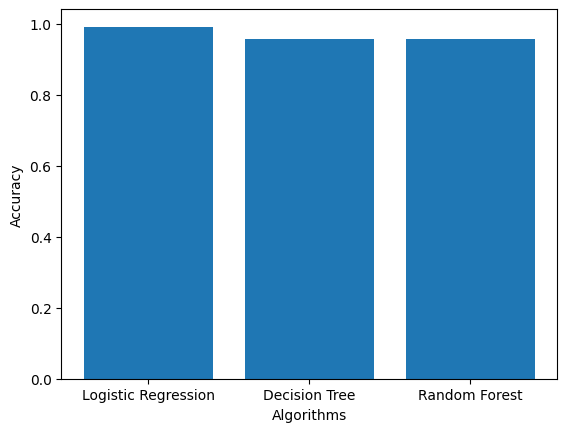

In [205]:
plt.bar(['Logistic Regression', 'Decision Tree', 'Random Forest'], [accLR, accDTC, accRTC],)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

> Logistic Regression is the most suitable model for this dataset, achieving the highest accuracy of approximately 99.1. It outperforms both the Decision Tree and Random Forest classifiers (which both achieved ~95.6%), suggesting that the classes in this dataset are likely linearly separable.

# Q2. Perform clustering and dimensionality reduction on the Iris dataset.

## 1. Dataset Loading & Basic Info (2 marks)

In [206]:
from sklearn.datasets import load_iris

In [207]:
dt = load_iris()
dt

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [208]:
x = dt.data
x.shape

(150, 4)

In [209]:
features = dt.feature_names
features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## 2. K-Means Clustering (4 marks)

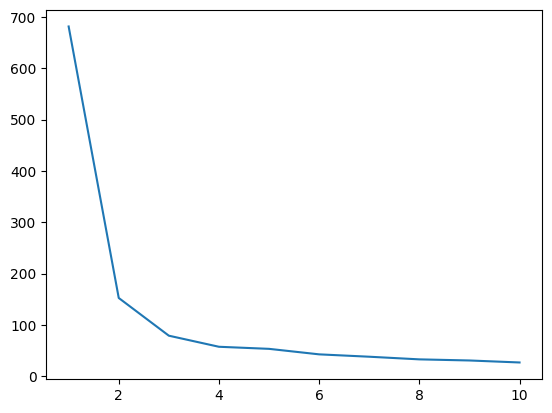

In [210]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeeans = KMeans(n_clusters=i, init='k-means++',random_state=41)
  kmeeans.fit(x)
  wcss.append(kmeeans.inertia_)
plt.plot(range(1,11),wcss)

In [211]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)

In [212]:
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [213]:
print("Samples\n",y_kmeans[:10])
print("\n")
print("Centers\n",kmeans.cluster_centers_)

Samples
 [1 1 1 1 1 1 1 1 1 1]


Centers
 [[5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.428      1.462      0.246     ]
 [6.85384615 3.07692308 5.71538462 2.05384615]]


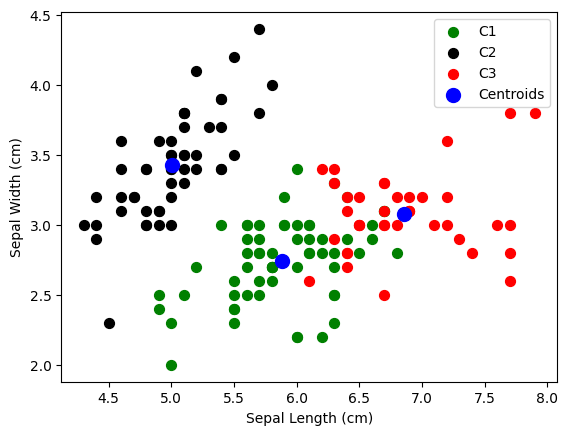

In [214]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=50, c='green', label='C1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=50, c='black', label='C2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=50, c='red', label='C3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='blue', label='Centroids')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()


## 3. PCA for Dimensionality Reduction (2 marks)

In [215]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

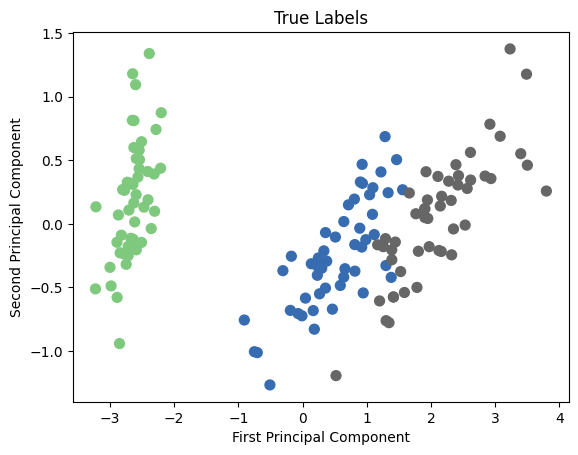

In [216]:
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=dt.target, cmap='Accent', s=50)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('True Labels')
plt.show()

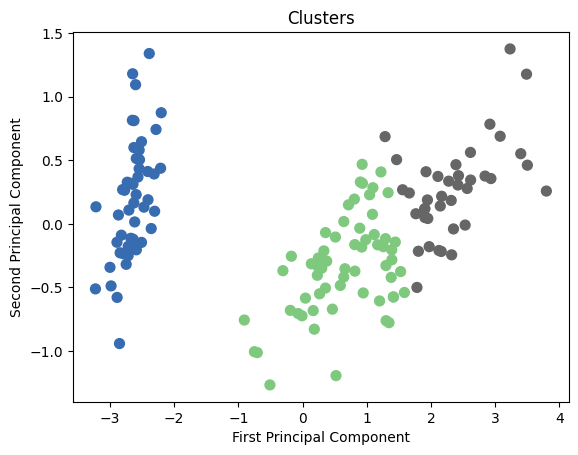

In [217]:
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_kmeans, cmap='Accent', s=50)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Clusters')
plt.show()



## 4. Short Analysis (2 marks)

> 1. Upon observing we find the true labels to be 3
> 2. Upon observing we find the cluster labels to be 3
> 3. K-means has worked fine, in determining the right clusters as it is in the original.

>  K-Means when using the Elbow method if the right value of clusters is chosen it works fine in segmenting the clusters with a good accuracy.